In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('advertising.csv')

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


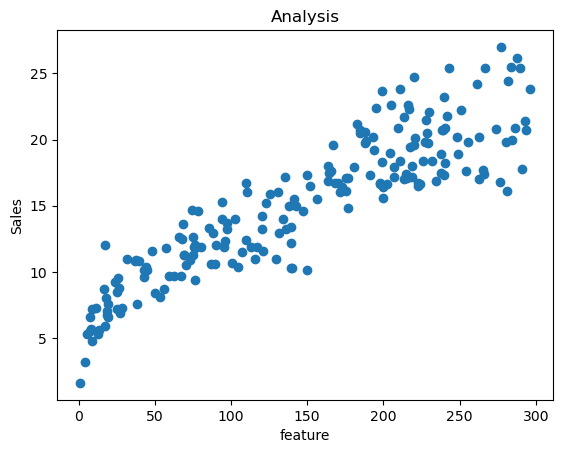

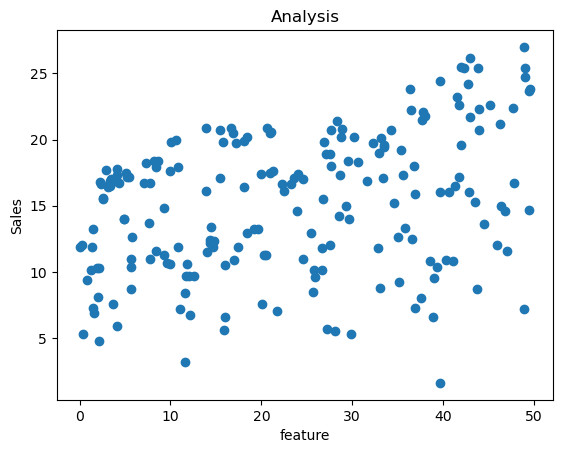

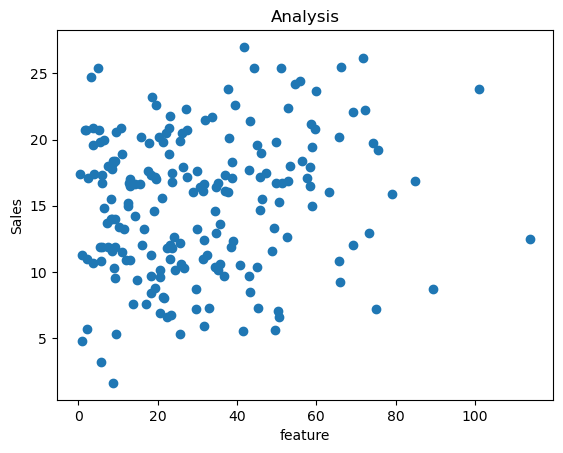

In [7]:
import matplotlib.pyplot as plt
features=['TV','Radio','Newspaper']
for feature in features:
    plt.scatter(data[feature],data['Sales'])
    plt.xlabel('feature')
    plt.ylabel('Sales')
    plt.title('Analysis')
    plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
x=data[['TV','Radio','Newspaper']]
y=data['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)
print("model intercept:",model.intercept_)
print("model coefficients:",model.coef_)

model intercept: 4.714126402214134
model coefficients: [0.05450927 0.10094536 0.00433665]


In [9]:
new_values = [[230, 37, 69],
              [150, 30, 40],
              [50, 20, 10],
              [100, 50, 20]]

predictions = model.predict(new_values)

D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
new_values = pd.DataFrame([
    [230, 37, 69],
    [150, 30, 40],
    [50, 20, 10],
    [100, 50, 20]
], columns=['TV', 'Radio', 'Newspaper'])

predictions = model.predict(new_values)

for vals, pred in zip(new_values.values, predictions):
    print(f"TV={vals[0]}, Radio={vals[1]}, Newspaper={vals[2]} → Predicted Sales = {pred:.2f}")

TV=230, Radio=37, Newspaper=69 → Predicted Sales = 21.29
TV=150, Radio=30, Newspaper=40 → Predicted Sales = 16.09
TV=50, Radio=20, Newspaper=10 → Predicted Sales = 9.50
TV=100, Radio=50, Newspaper=20 → Predicted Sales = 15.30


In [11]:
y_pred = model.predict(X_test)

NameError: name 'X_test' is not defined

In [12]:
y_pred=model.predict(x_test)

In [14]:
from sklearn.metrics import r2_score
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.9059011844150826
MSE: 2.907756910271091


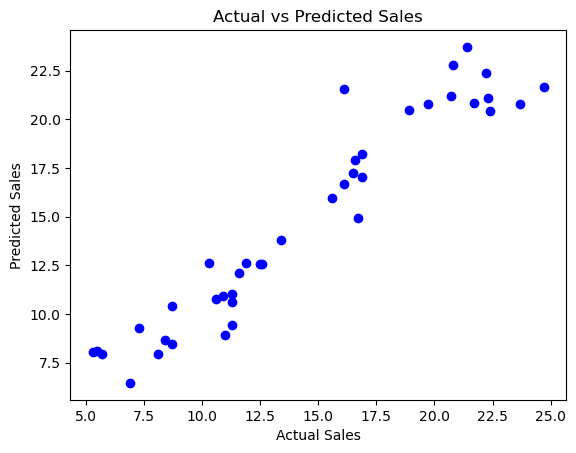

In [15]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()